In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

sys.path.append('../functions/')

from postprocessing import data_selector

## Data Source

The data analyzed in this notebook may be found at the National Renewable Energy Laboratory's ReEDS scenario viewer. 

[Link to the download page](https://scenarioviewer.nrel.gov/?project=03ad535d-f0ed-4a6b-8323-c582a606e92c&mode=download&layout=Default). 

The specific dataset being analyzed corresponds to the state-level data (location: "states").

In [2]:
reeds_std_2023_states = pd.read_csv('../StdScen23_allScenarios_annual_states.csv', skiprows=2, low_memory=False)

In [3]:
reeds_std_2023_states['policy'].unique()

array(['currentPolicies', '100by2035', '95by2050'], dtype=object)

In [4]:
reeds_std_2023_states.columns

Index(['scenario', 'policy', 'state', 't', 'load_enduse_MWh',
       'load_dist_loss_MWh', 'load_trans_loss_MWh', 'load_canada_exports_MWh',
       'load_storage_charging_MWh', 'load_electrolyzer_MWh', 'load_dac_MWh',
       'load_MWh', 'h2_produced_mt', 'battery_4_MW', 'battery_8_MW', 'bio_MW',
       'bio-ccs_MW', 'coal_ccs_MW', 'coal_MW', 'csp_MW', 'distpv_MW',
       'gas_cc_ccs_MW', 'gas_cc_MW', 'gas_ct_MW', 'geo_MW', 'hydro_MW',
       'nuclear_MW', 'nuclear_smr_MW', 'o-g-s_MW', 'pumped-hydro_MW',
       'h2-ct_MW', 'upv_MW', 'wind_offshore_MW', 'wind_onshore_MW', 'dac_MW',
       'electrolyzer_MW', 'battery_4_MWh', 'battery_8_MWh', 'bio_MWh',
       'bio-ccs_MWh', 'canada_MWh', 'coal_ccs_MWh', 'coal_MWh', 'csp_MWh',
       'distpv_MWh', 'gas_cc_ccs_MWh', 'gas_cc_MWh', 'gas_ct_MWh', 'geo_MWh',
       'hydro_MWh', 'nuclear_MWh', 'nuclear_smr_MWh', 'o-g-s_MWh',
       'pumped-hydro_MWh', 'h2-ct_MWh', 'upv_MWh', 'wind_offshore_MWh',
       'wind_onshore_MWh', 'generation', 'generati

In [5]:
reeds_std_2023_states['scenario'].unique()

array(['DAC', 'DAC_100by2035', 'DAC_95by2050', 'DC_Tran_100by2035',
       'DC_Trans', 'DC_Trans_95by2050', 'High_CCS_Cost',
       'High_CCS_Cost_100by2035', 'High_CCS_Cost_95by2050',
       'High_Demand_Growth', 'High_Demand_Growth_100by2035',
       'High_Demand_Growth_95by2050', 'High_H2', 'High_H2_95by2050',
       'High_H2_100by2035', 'High_H2_and_Demand',
       'High_H2_and_Demand_95by2050', 'High_H2_and_Demand_100by2035',
       'High_NG_Price', 'High_NG_Price_100by2035',
       'High_NG_Price_95by2050', 'High_RE_Cost', 'High_RE_Cost_95by2050',
       'High_RE_Cost_100by2035', 'Limited_Trans',
       'Limited_Trans_100by2035', 'Limited_Trans_95by2050',
       'Low_CCS_Cost', 'Low_CCS_Cost_100by2035', 'Low_CCS_Cost_95by2050',
       'Low_Demand_Growth', 'Low_Demand_Growth_100by2035',
       'Low_Demand_Growth_95by2050', 'Low_NG_Price',
       'Low_NG_Price_100by2035', 'Low_NG_Price_95by2050',
       'Low_Nuclear_Cost', 'Low_Nuclear_Cost_100by2035',
       'Low_Nuclear_Cost_95by

In [6]:
policy = '100by2035'
state = 'MI'
scenario = None
year = 2036
df = data_selector(reeds_std_2023_states,policy=policy,state=state,scenario=scenario, t=year)
mwh_df = data_selector(reeds_std_2023_states,policy=policy,state=state,scenario=scenario, t=year, results='energy')
mwh_df.drop(columns=['load_enduse_MWh','load_MWh',
                    'load_dist_loss_MWh','load_trans_loss_MWh','load_canada_exports_MWh',
                    'load_storage_charging_MWh','load_electrolyzer_MWh','load_dac_MWh'], inplace=True)

In [7]:
df.describe()

,t,battery_4_MW,battery_8_MW,bio_MW,bio-ccs_MW,coal_ccs_MW,coal_MW,csp_MW,distpv_MW,gas_cc_ccs_MW,...,nuclear_MW,nuclear_smr_MW,o-g-s_MW,pumped-hydro_MW,h2-ct_MW,upv_MW,wind_offshore_MW,wind_onshore_MW,dac_MW,electrolyzer_MW
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,...,19.000000,19.0,19.000000,19.0,19.000000,19.000000,19.0,19.000000,19.0,19.000000
mean,2036.0,2310.178947,82.500000,677.078947,1663.310526,316.215789,0.0,0.0,3336.805263,2719.510526,...,3887.668421,0.0,3089.415789,2143.8,2894.631579,5359.757895,0.0,29730.757895,0.0,1268.873684
std,0.0,798.336293,199.934439,1829.774010,561.229998,750.280162,0.0,0.0,461.775623,1864.525695,...,2483.127079,0.0,984.674138,0.0,1088.993223,1741.263190,0.0,6013.833270,0.0,677.824303
min,2036.0,639.200000,0.000000,257.300000,0.000000,0.000000,0.0,0.0,1745.500000,0.000000,...,3318.000000,0.0,0.000000,2143.8,0.000000,2720.200000,0.0,13375.700000,0.0,0.000000
25%,2036.0,2094.400000,0.000000,257.300000,1868.050000,0.000000,0.0,0.0,3363.500000,777.550000,...,3318.000000,0.0,3428.500000,2143.8,3240.050000,4230.800000,0.0,28208.950000,0.0,1171.250000
50%,2036.0,2441.400000,0.000000,257.300000,1899.000000,0.000000,0.0,0.0,3363.500000,3334.900000,...,3318.000000,0.0,3555.400000,2143.8,3242.500000,5433.800000,0.0,29035.500000,0.0,1278.800000
75%,2036.0,2829.000000,37.250000,257.300000,1899.000000,0.000000,0.0,0.0,3363.500000,3889.950000,...,3318.000000,0.0,3555.400000,2143.8,3243.100000,6483.050000,0.0,30406.000000,0.0,1326.250000
max,2036.0,3597.200000,642.900000,8233.100000,1899.500000,2002.700000,0.0,0.0,4474.300000,5834.600000,...,14141.700000,0.0,3555.400000,2143.8,3731.100000,8459.900000,0.0,45569.500000,0.0,2899.900000


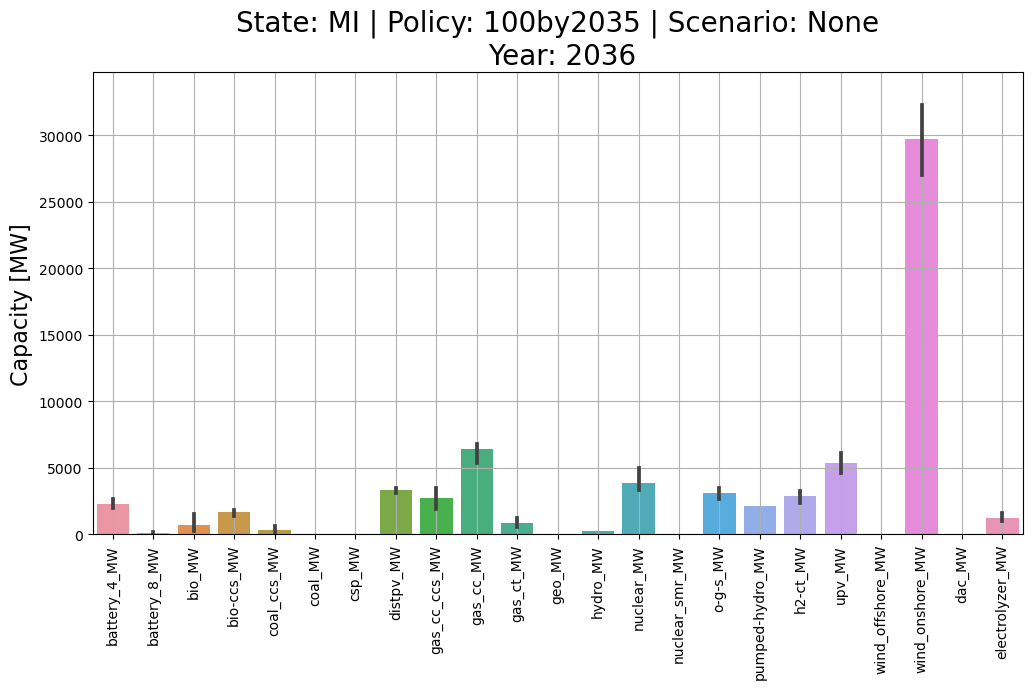

In [8]:
fig, ax = plt.subplots(1,figsize=(12, 6))
sns.barplot(ax=ax,data=df.iloc[:,4:])
ax.set_title(f"State: {state} | Policy: {policy} | Scenario: {scenario}\n Year: {year}", fontsize=20)
ax.set_xticklabels(df.iloc[:,4:].columns, rotation=90)
ax.set_ylabel("Capacity [MW]", fontsize=16)
ax.grid()
ymean = df.iloc[:,4:].mean().max()
yspace = 5e3
ax.set_ylim(0, ymean+yspace)
plt.show()

In [9]:
color_list = ['darkviolet','violet','forestgreen','tab:green',
              'grey','black','rosybrown','saddlebrown','peru',
              'darkorange','darkred','teal','crimson','purple',
              'lavender','lime','hotpink','gold','yellow',
              'lightskyblue','turquoise','olive','aqua']

In [10]:
colormap = dict(zip(list(df.iloc[:,4:].columns),color_list))

In [11]:
display(colormap)

{'battery_4_MW': 'darkviolet',
 'battery_8_MW': 'violet',
 'bio_MW': 'forestgreen',
 'bio-ccs_MW': 'tab:green',
 'coal_ccs_MW': 'grey',
 'coal_MW': 'black',
 'csp_MW': 'rosybrown',
 'distpv_MW': 'saddlebrown',
 'gas_cc_ccs_MW': 'peru',
 'gas_cc_MW': 'darkorange',
 'gas_ct_MW': 'darkred',
 'geo_MW': 'teal',
 'hydro_MW': 'crimson',
 'nuclear_MW': 'purple',
 'nuclear_smr_MW': 'lavender',
 'o-g-s_MW': 'lime',
 'pumped-hydro_MW': 'hotpink',
 'h2-ct_MW': 'gold',
 'upv_MW': 'yellow',
 'wind_offshore_MW': 'lightskyblue',
 'wind_onshore_MW': 'turquoise',
 'dac_MW': 'olive',
 'electrolyzer_MW': 'aqua'}

In [12]:
df.scenario.unique()

array(['DAC_100by2035', 'DC_Tran_100by2035', 'High_CCS_Cost_100by2035',
       'High_Demand_Growth_100by2035', 'High_H2_100by2035',
       'High_H2_and_Demand_100by2035', 'High_NG_Price_100by2035',
       'High_RE_Cost_100by2035', 'Limited_Trans_100by2035',
       'Low_CCS_Cost_100by2035', 'Low_Demand_Growth_100by2035',
       'Low_NG_Price_100by2035', 'Low_Nuclear_Cost_100by2035',
       'Low_RE_Cost_100by2035', 'Mid_Case_100by2035',
       'Mid_Case_100by2035_No_Growth_Penalties',
       'Mid_Case_100by2035_NoNascent', 'No_TC_Expiration_100by2035',
       'Reduced_RE_Resource_100by2035'], dtype=object)

In [13]:
policy = '100by2035'
state = 'MI'
scenario = 'Mid_Case_100by2035'
year = None
df_alltime = data_selector(reeds_std_2023_states,policy=policy,state=state,scenario=scenario, t=year)
df_alltime.set_index('t', drop=True, inplace=True)

In [14]:
df_alltime

,scenario,policy,state,battery_4_MW,battery_8_MW,bio_MW,bio-ccs_MW,coal_ccs_MW,coal_MW,csp_MW,...,nuclear_MW,nuclear_smr_MW,o-g-s_MW,pumped-hydro_MW,h2-ct_MW,upv_MW,wind_offshore_MW,wind_onshore_MW,dac_MW,electrolyzer_MW
t,,,,,,,,,,,,,,,,,,,,,
2024,Mid_Case_100by2035,100by2035,MI,0.0,0.0,325.3,0.0,0.0,5979.9,0.0,...,3318.0,0.0,2662.2,2143.8,0.0,1130.2,0.0,3577.7,0.0,0.0
2026,Mid_Case_100by2035,100by2035,MI,0.0,0.0,325.3,0.0,0.0,3066.0,0.0,...,3318.0,0.0,3892.7,2143.8,0.0,1380.2,0.0,7005.7,0.0,0.0
2028,Mid_Case_100by2035,100by2035,MI,290.0,0.0,325.3,0.0,0.0,3066.0,0.0,...,3318.0,0.0,3892.7,2143.8,0.0,1380.2,0.0,15405.7,0.0,0.0
2030,Mid_Case_100by2035,100by2035,MI,1000.0,0.0,307.6,0.0,0.0,1531.0,0.0,...,3318.0,0.0,3604.2,2143.8,0.0,1380.2,0.0,24968.7,0.0,0.0
2032,Mid_Case_100by2035,100by2035,MI,1008.8,0.0,289.9,0.0,0.0,1531.0,0.0,...,3318.0,0.0,3589.6,2143.8,0.0,2304.8,0.0,27177.3,0.0,0.0
2034,Mid_Case_100by2035,100by2035,MI,2441.4,0.0,257.3,270.6,0.0,0.0,0.0,...,3318.0,0.0,3587.4,2143.8,0.0,4571.0,0.0,28407.4,0.0,0.0
2036,Mid_Case_100by2035,100by2035,MI,2441.4,0.0,257.3,1871.7,0.0,0.0,0.0,...,3318.0,0.0,3555.4,2143.8,3243.1,5433.8,0.0,28778.0,0.0,1278.8
2038,Mid_Case_100by2035,100by2035,MI,2441.4,97.7,219.3,1874.2,0.0,0.0,0.0,...,3318.0,0.0,3478.2,2143.8,3243.1,5496.8,0.0,28937.6,0.0,1278.8
2040,Mid_Case_100by2035,100by2035,MI,2441.4,97.7,184.3,1876.4,0.0,0.0,0.0,...,3318.0,0.0,3478.2,2143.8,3250.9,5496.8,0.0,28756.8,0.0,1373.0


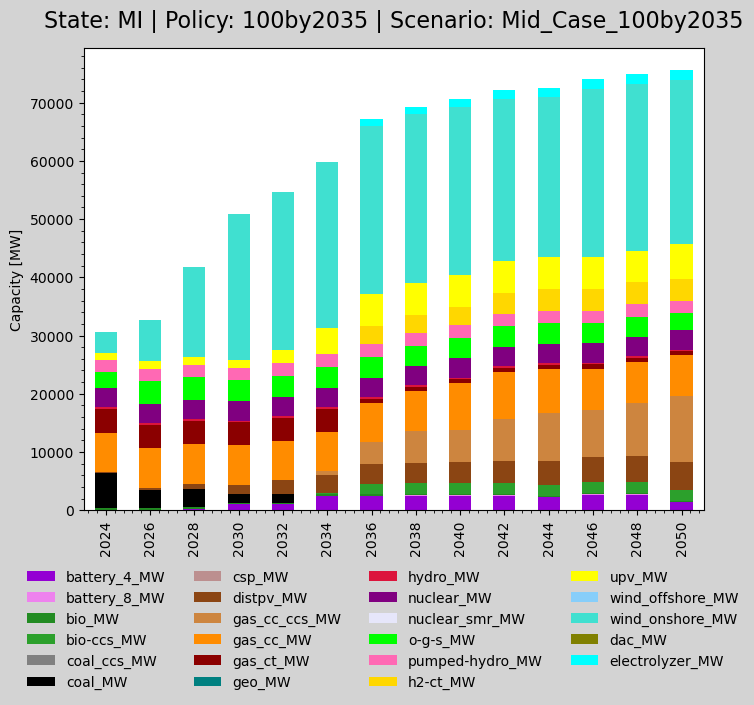

In [15]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray')
df_alltime.iloc[:,3:].plot.bar(ax=ax,stacked=True, color=colormap)
ax.set_xlabel('')
ax.set_ylabel("Capacity [MW]")
ax.set_title(f"State: {state} | Policy: {policy} | Scenario: {scenario}", fontsize=16, pad=15)
ax.minorticks_on()
# ax.grid(which='minor', alpha=0.2, color='red')
# ax.grid(which='major', alpha=0.4, color='k')
ax.legend(loc=(-0.1,-0.4), ncols=4,facecolor='lightgray', fancybox=False, shadow=False, edgecolor='lightgray')
plt.show()